In [97]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [98]:
dataset = xr.open_dataset("tco300_omimls_oct2004_to_dec2024_1by1.nc")

OMI/MLS Ground-to-300hPa Column Ozone for TOARII

So now it is time for some data cleaning, there should not be negative values in the data

In [99]:
ozone_data = dataset["TropoO3"]
cleaned_ozone_dataset = ozone_data.where(ozone_data >= 0)
dataset["TropoO3"] = cleaned_ozone_dataset

In [100]:
dataset

<xarray.Dataset> Size: 63MB
Dimensions:  (months: 243, y_elements: 180, x_elements: 360)
Dimensions without coordinates: months, y_elements, x_elements
Data variables:
    TropoO3  (months, y_elements, x_elements) float32 63MB nan nan ... nan nan
Attributes:
    Title:    OMI/MLS Ground-to-300hPa Column Ozone for TOARII, etc.

Try to visualize this cleaned data now for arbitrary month

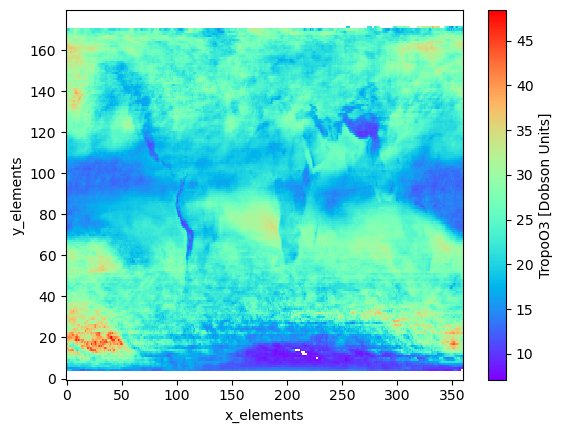

In [101]:
ozone_first_month = dataset["TropoO3"].isel(months=24)
ozone_first_month.plot(cmap='rainbow') ## viridis?